# Graph 

In [1]:
from __future__ import print_function
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; } </style>"))
import matplotlib.pyplot as plt

In [2]:
from pkg.realsense import *
from pkg.kinect import *
from pkg.marker_config import *
from pkg.stereo import *

pipeline=init_rs()
init_kn()
aruco_map, dictionary = get_aruco_config()

Start streaming
Device configuration: 
	color_format: 3 
	(0:JPG, 1:NV12, 2:YUY2, 3:BGRA32)

	color_resolution: 5 
	(0:OFF, 1:720p, 2:1080p, 3:1440p, 4:1536p, 5:2160p, 6:3072p)

	depth_mode: 3 
	(0:OFF, 1:NFOV_2X2BINNED, 2:NFOV_UNBINNED,3:WFOV_2X2BINNED, 4:WFOV_UNBINNED, 5:Passive IR)

	camera_fps: 2 
	(0:5 FPS, 1:15 FPS, 2:30 FPS)

	synchronized_images_only: False 
	(True of False). Drop images if the color and depth are not synchronized

	depth_delay_off_color_usec: 0 ms. 
	Delay between the color image and the depth image

	wired_sync_mode: 0
	(0:Standalone mode, 1:Master mode, 2:Subordinate mode)

	subordinate_delay_off_master_usec: 0 ms.
	The external synchronization timing.

	disable_streaming_indicator: False 
	(True or False). Streaming indicator automatically turns on when the color or depth camera's are in use.




In [3]:
T_c21, kn_config, rs_config = calibrate_stereo(aruco_map, dictionary)

In [4]:
objectPose_dict, corner_dict, color_image, rs_image, rs_corner_dict, objectPoints_dict, point3D_dict, err_dict = \
    get_object_pose_dict_stereo(T_c21, kn_config, rs_config, aruco_map, dictionary)

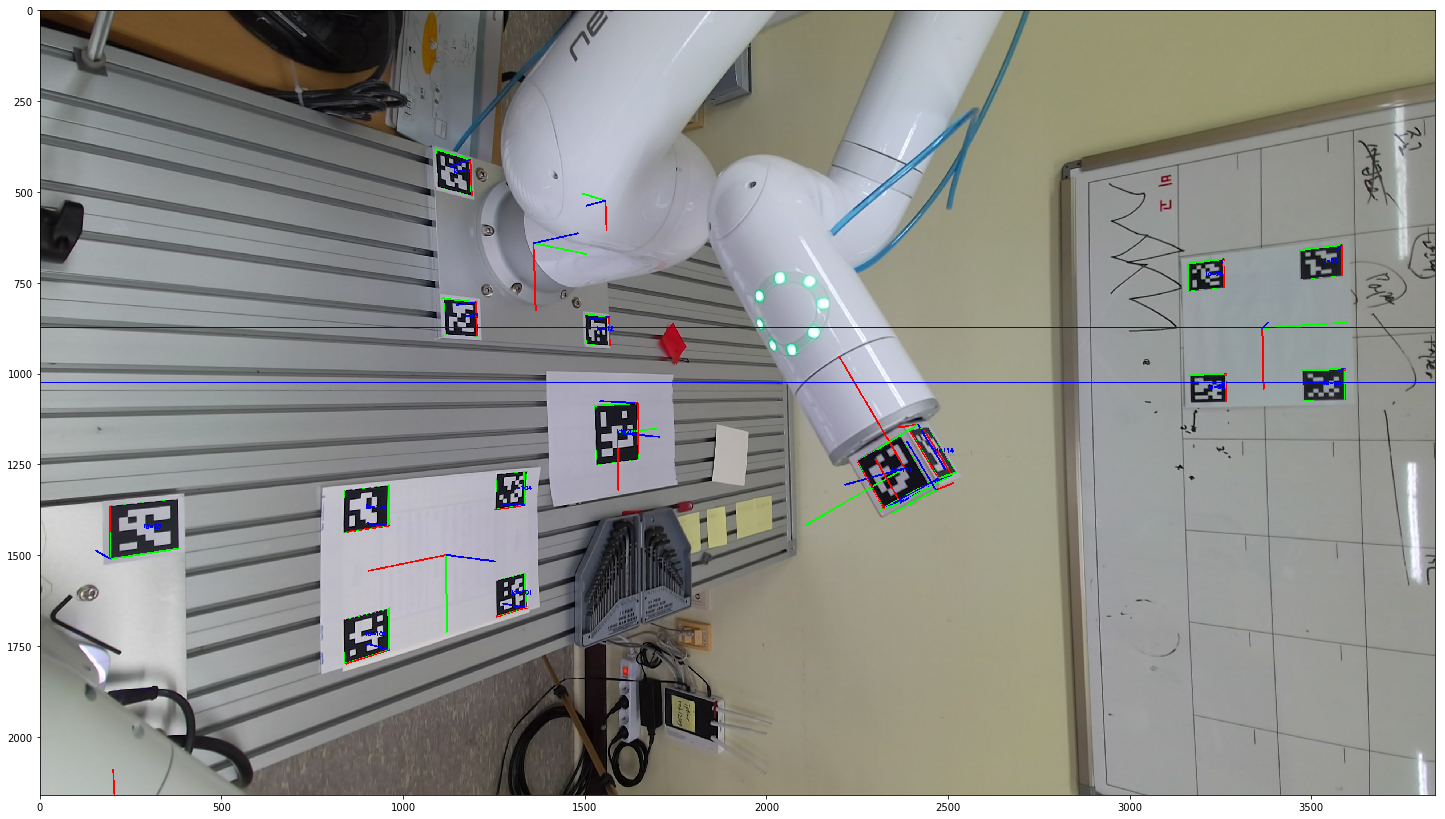

In [5]:
color_image_out = draw_objects(color_image.copy(), aruco_map, objectPose_dict, corner_dict, kn_config[0], kn_config[1], axis_len=0.1)
plt.figure(figsize=(25,15))
plt.imshow(color_image_out[:,:,[2,1,0]])